In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [8]:
size=(6,6)

# Data

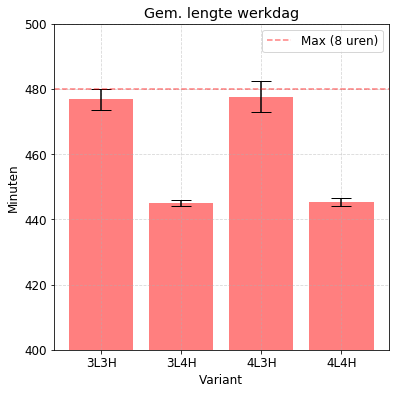

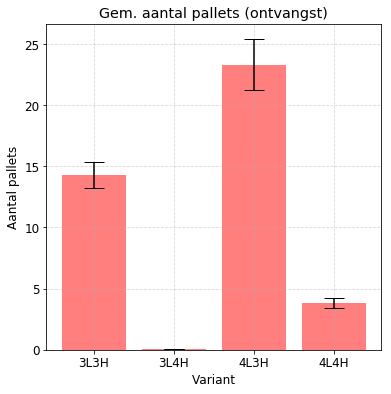

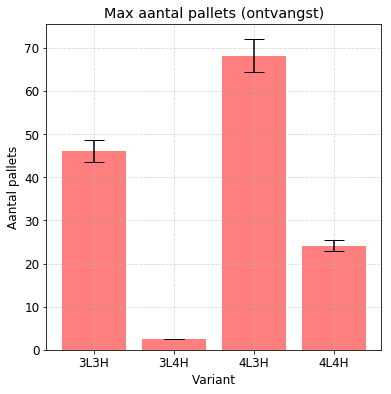

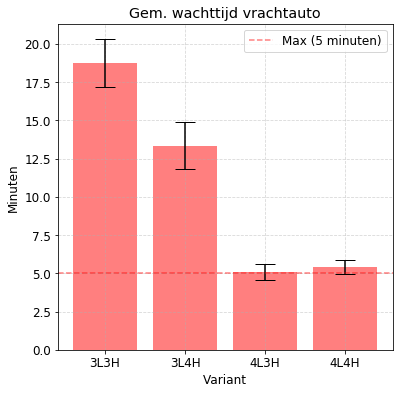

In [16]:
# Data for the simulations.
variant = ['3L3H']*4 + ['4L3H']*4 + ['4L4H']*4 + ['3L4H']*4
atoom = ['Magazijn', 'Ontvangstruimte', 'Ontvangstruimte', 'Wachtrij']*4
metric1 = 'Gem. lengte werkdag'
metric2 = 'Gem. aantal pallets (ontvangst)'
metric3 = 'Max aantal pallets (ontvangst)'
metric4 = 'Gem. wachttijd vrachtauto'
omschrijving = [metric1, metric2, metric3, metric4]*4
avg = [476.76, 14.32, 46.13, 18.75, 
       477.59, 23.32, 68.19, 5.09,
       445.38, 3.83, 24.12, 5.42,
       445.04, 0.10, 2.47, 13.34]
stdev = [31.73, 10.57, 25.02, 15.55,
         46.76, 20.72, 37.99, 5.46,
         13.11, 3.81, 13.19, 4.42,
         9.79, 0.04, 0.52, 15.34]
uom = ['Minuten', 'Aantal pallets', 'Aantal pallets', 'Minuten']*4



# Setup the dataframe.
df = pd.DataFrame()
run_count = 100
df['Variant'] = variant
df['Atoom'] = atoom
df['Omschrijving'] = omschrijving
df['Gemiddelde'] = avg
df['Standaardafwijking'] = stdev
df['Standaardafwijking'] /= sqrt(run_count)
df['Eenheid'] = uom

# Get subselection for each metric.
dfm1 = df.loc[df['Omschrijving'] == metric1]
dfm2 = df.loc[df['Omschrijving'] == metric2]
dfm3 = df.loc[df['Omschrijving'] == metric3]
dfm4 = df.loc[df['Omschrijving'] == metric4]
dfmetrics = [dfm1, dfm2, dfm3, dfm4]

font = {'size'   : 12}
matplotlib.rc('font', **font)

# Plot bar charts.
for dfm in dfmetrics:
    plt.figure(figsize=size)
    plt.bar(dfm['Variant'], dfm['Gemiddelde'], yerr=dfm['Standaardafwijking'], capsize=10, facecolor='red', alpha=.5)
    plt.title(dfm['Omschrijving'].iloc[0])
    plt.ylabel(dfm['Eenheid'].iloc[0])
    plt.grid(ls='dashed', alpha=.5)
    if dfm['Omschrijving'].iloc[0] == metric1:
        plt.axhline(480, c='r', ls='dashed', alpha=0.5)
        legend(['Max (8 uren)'])
        plt.ylim(400,500)
    if dfm['Omschrijving'].iloc[0] == metric4:
        plt.axhline(5, c='r', ls='dashed', alpha=0.5)
        legend(['Max (5 minuten)'])
    plt.xlabel('Variant')
    plt.show()

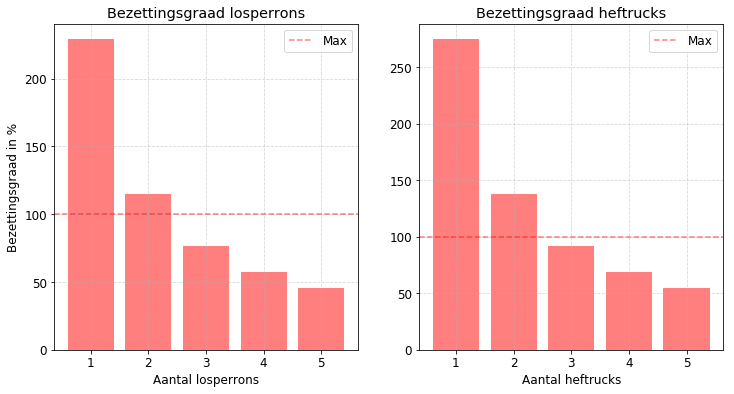

In [35]:
aantal = np.array(range(5))+1
aantal_losperons = [229.17, 114.58, 76.39, 57.29, 45.83]
aantal_heftrucks = [275.00, 137.50, 91.67, 68.75, 55.00]
df = pd.DataFrame()
df['Aantal'] = aantal
metric1 = 'losperrons'
metric2 = 'heftrucks'
df[metric1] = aantal_losperons
df[metric2] = aantal_heftrucks


metrics=[metric1,metric2]

plt.figure(figsize=(6,12))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))


ax1.bar(df['Aantal'], df[metric1], facecolor='red', alpha=.5)
ax1.set_title('Bezettingsgraad {}'.format(metric1))
ax1.set_ylabel('Bezettingsgraad in %')
ax1.set_xlabel('Aantal {}'.format(metric1))
ax1.grid(ls='dashed',alpha=.5)
ax1.axhline(100, ls='dashed', alpha=0.5, c='red')
ax1.legend(['Max'])

ax2.bar(df['Aantal'], df[metric2], facecolor='red', alpha=.5)
ax2.set_title('Bezettingsgraad {}'.format(metric2))
#ax2.set_ylabel('Bezettingsgraad in %')
ax2.set_xlabel('Aantal {}'.format(metric2))
ax2.grid(ls='dashed',alpha=.5)
ax2.axhline(100, ls='dashed', alpha=0.5, c='red')
ax2.legend(['Max'])

    
    
plt.show()

In [4]:
df

,Aantal,losperrons,heftrucks
0,1,229.17,275.00
1,2,114.58,137.50
2,3,76.39,91.67
3,4,57.29,68.75
4,5,45.83,55.00
